In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sub_funcs import *

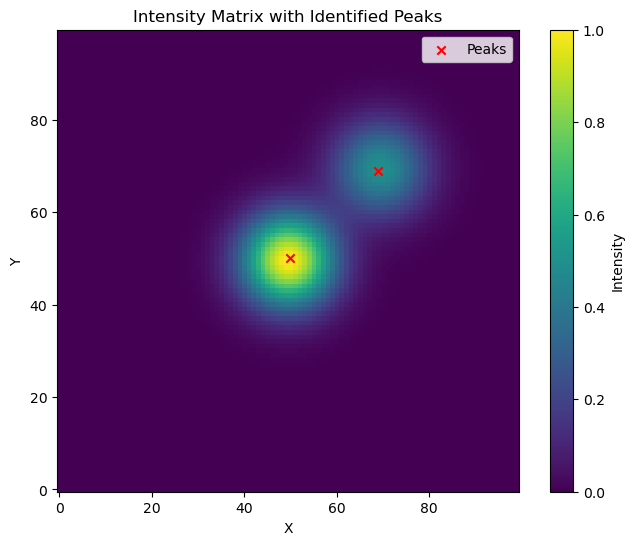

In [2]:
# Generate example intensity matrix with two Gaussian spots
# Replace this with your actual intensity matrix
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
intensity_matrix = 2*np.exp(-x**2 - y**2) + 1*np.exp(-(x-2)**2 - (y-2)**2)

peaks = peak_detection(intensity_matrix, threshold_abs= 0.9)
x_coords, y_coords = zip(*peaks)

# Plot the intensity matrix with identified peaks
plt.figure(figsize=(8, 6))
plt.imshow(intensity_matrix, cmap='viridis', origin='lower')
plt.scatter(x_coords,y_coords, color='red', marker='x', label='Peaks')
plt.colorbar(label='Intensity')
plt.title('Intensity Matrix with Identified Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [3]:
peaks

array([[50, 50],
       [69, 69]])

In [4]:
gaussian_params = fit_gaussian_2d(intensity_matrix, peaks_coords=peaks, ROI_radius=5)
write_gaussian_params_to_file(gaussian_params = gaussian_params, peaks=peaks, filename='gaussian_params.txt')

In [5]:
peaks

array([[50, 50],
       [69, 69]])

In [6]:
gaussian_params = read_gaussian_params_from_file('gaussian_params.txt')

In [7]:
gaussian_params

[{'x0': 49.51111195699044,
  'y0': 49.51111195699578,
  'A': 1.9995995082096345,
  'sigma_x': 7.017095994805578,
  'sigma_y': 7.017095994777534},
 {'x0': 69.25748480277534,
  'y0': 69.25748480278821,
  'A': 0.9995654684232966,
  'sigma_x': 7.059581815692631,
  'sigma_y': 7.059581815937094},
 {'x0': 49.51111195699044,
  'y0': 49.51111195699578,
  'A': 1.9995995082096345,
  'sigma_x': 7.017095994805578,
  'sigma_y': 7.017095994777534},
 {'x0': 69.25748480277534,
  'y0': 69.25748480278821,
  'A': 0.9995654684232966,
  'sigma_x': 7.059581815692631,
  'sigma_y': 7.059581815937094},
 {'x_peak': 50.0,
  'y_peak': 50.0,
  'x0': 49.51111195699044,
  'y0': 49.51111195699578,
  'A': 1.9995995082096345,
  'sigma_x': 7.017095994805578,
  'sigma_y': 7.017095994777534},
 {'x_peak': 69.0,
  'y_peak': 69.0,
  'x0': 69.25748480277534,
  'y0': 69.25748480278821,
  'A': 0.9995654684232966,
  'sigma_x': 7.059581815692631,
  'sigma_y': 7.059581815937094}]